# Traçando gráficos com matplotlib
Usando matplotlib para criar gráficos de barras que permitam visualizar as conclusões que foram tiradas com groupby e query.

In [62]:
# Importando os pacotes necessários e carregando o arquivo `winequality_edited.csv`
import pandas as pd
from matplotlib import pyplot as plt

wine_df = pd.read_csv('winequality_edited.csv')
wine_df.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Baixo
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Moderadamente Alto
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Médio
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,Moderadamente Alto
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Baixo


In [79]:
wine_df.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,Médio
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,Moderadamente Alto
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,Alto
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,Baixo
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white,Médio


### #1: Será que vinhos com maior teor alcóolico recebem avaliações melhores?
Criando um gráfico de barras com uma barra para amostras de vinho com baixo teor alcóolico e outra para amostras com alto teor alcóolico.

In [80]:
# Use query para selecionar cada grupo e obter sua qualidade média
alcohol_median = wine_df['alcohol'].median()
alcohol_low = wine_df.query('alcohol < {}'.format(alcohol_median))
alcohol_high = wine_df.query('alcohol >= {}'.format(alcohol_median))

alcohol_mean_quality_low = alcohol_low['quality'].mean()
alcohol_mean_quality_high = alcohol_high['quality'].mean()

alcohol_median, alcohol_mean_quality_low, alcohol_mean_quality_high

(10.3, 5.475920679886686, 6.146084337349397)

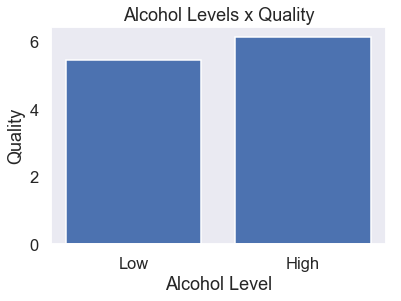

In [76]:
locations=[1,2]
heights = [alcohol_mean_quality_low, alcohol_mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Alcohol Levels x Quality')
plt.xlabel('Alcohol Level')
plt.ylabel('Quality');

### #2: Vinhos mais suaves recebem avaliações melhores?
Criando um gráfico de barras com uma barra para amostras de vinho com baixo nível de açúcar residual e outra para amostras com alto nível de açúcar residual.

In [77]:
# query para selecionar cada grupo e obter sua qualidade média
median_sugar = wine_df['residual_sugar'].median()

sugar_low = wine_df.query('residual_sugar < {}'.format(median_sugar))
sugar_high = wine_df.query('residual_sugar >= {}'.format(median_sugar))

sugar_mean_quality_low = sugar_low['quality'].mean()
sugar_mean_quality_high = sugar_high['quality'].mean()

median_sugar, sugar_mean_quality_low, sugar_mean_quality_high

(3.0, 5.808800743724822, 5.82782874617737)

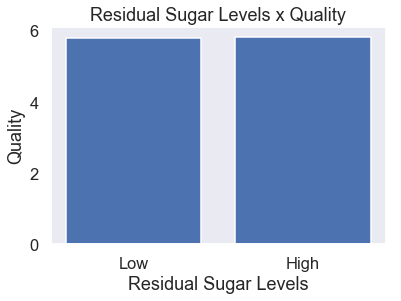

In [78]:
# Criando um gráfico de barras com rótulos adequados
locations=[1,2]
heights = [sugar_mean_quality_low, sugar_mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Residual Sugar Levels x Quality')
plt.xlabel('Residual Sugar Levels')
plt.ylabel('Quality');

### #3: Qual o nível de acidez que recebe a maior avaliação média?
Criando um gráfico de barras com uma barra para cada um dos quatro níveis de acidez.


In [59]:
# Use groupby para obter a qualidade média para cada nível de acidez
wine_df.groupby(['acidity_levels'])['quality'].mean()

acidity_levels
Alto                  5.783343
Baixo                 5.859593
Moderadamente Alto    5.784540
Médio                 5.850832
Name: quality, dtype: float64

In [60]:

acidity_high = wine_df.query("acidity_levels == 'Alto'")
acidity_low = wine_df.query("acidity_levels == 'Baixo'")
acidity_median_high = wine_df.query("acidity_levels == 'Moderadamente Alto'")
acidity_median = wine_df.query("acidity_levels == 'Médio'")

mean_quality_high = acidity_high['quality'].mean()
mean_quality_low = acidity_low['quality'].mean()
mean_quality_median_high = acidity_median_high['quality'].mean()
mean_quality_median = acidity_median['quality'].mean()

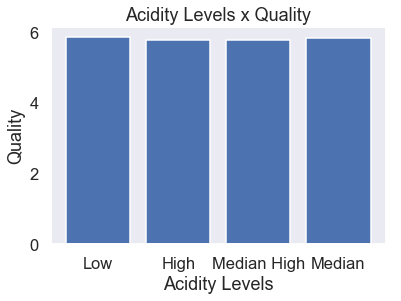

In [61]:
# Crie um gráfico de barras com rótulos adequados
locations=[1,2,3,4]
heights = [mean_quality_low, mean_quality_high, mean_quality_median_high, mean_quality_median]
labels = ['Low', 'High', 'Median High', 'Median']
plt.bar(locations, heights, tick_label=labels)
plt.title('Acidity Levels x Quality')
plt.xlabel('Acidity Levels')
plt.ylabel('Quality');

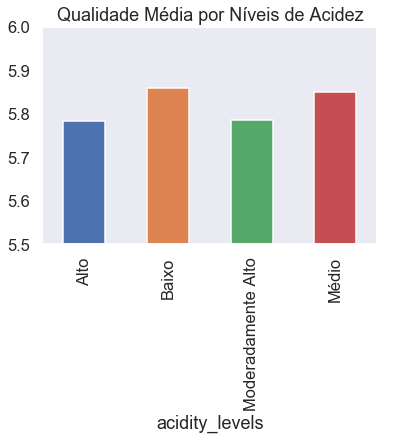

In [69]:
wine_df.groupby(["acidity_levels"]).mean()["quality"].plot(kind="bar", ylim=(5.5,6), title="Qualidade Média por Níveis de Acidez")

### Bonus: Criando um gráfico de linha para os dados em #3
Usando a função [plot](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) do pyplot para isso.

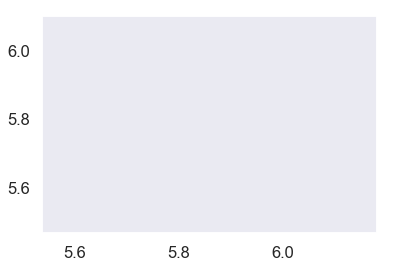